Importing libraries

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import re
sns.set()

Loading dataset

In [2]:
df = pd.read_csv('Sample_real_estate_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


Finding and Handlling the missing values

In [3]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [4]:
data = pd.read_csv('Sample_real_estate_data.csv', na_values = ['na'])
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [5]:
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [6]:
data.shape

(9, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  6 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [8]:
for i in data['NUM_BEDROOMS']:
    print(data.loc[2, 'NUM_BEDROOMS'])

nan
nan
nan
nan
nan
nan
nan
nan
nan


In [9]:
count = 0
for i in data['NUM_BATH']:
    try:
        int(i)
    except ValueError:
        try:
            float(i)
        except ValueError:
            data.loc[count, 'NUM_BATH'] = np.nan
    count += 1

In [10]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [11]:
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        2
SQ_FT           1
dtype: int64

In [12]:
print(data.isnull().values.any())

True


In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [14]:
data['ST_NUM'] = imputer.fit_transform(data[['ST_NUM']])

In [15]:
data['NUM_BEDROOMS'] = imputer.fit_transform(data[['NUM_BEDROOMS']])

In [16]:
data['NUM_BATH'] = imputer.fit_transform(data[['NUM_BATH']])

In [17]:
data['SQ_FT'] = imputer.fit_transform(data[['SQ_FT']])

In [18]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,203.0,LEXINGTON,N,2.5,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1.0,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1.0,800.0
6,100007000.0,203.0,WASHINGTON,NaN,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,900.0
8,100009000.0,215.0,TREMONT,Y,2.5,2.0,1800.0


In [19]:
mode_oc = data['OWN_OCCUPIED'].mode()
mode_oc[0]

'Y'

In [20]:
data['OWN_OCCUPIED'].fillna(mode_oc[0], inplace = True)

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\4144042709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['OWN_OCCUPIED'].fillna(mode_oc[0], inplace = True)


In [21]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,203.0,LEXINGTON,N,2.5,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,1.0,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1.0,800.0
6,100007000.0,203.0,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,900.0
8,100009000.0,215.0,TREMONT,Y,2.5,2.0,1800.0


Dropping unnecessary columns

In [22]:
data.drop(columns = ['PID'], axis = 1, inplace = True)

In [23]:
data

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,100.0
2,203.0,LEXINGTON,N,2.5,1.0,850.0
3,201.0,BERKELEY,Y,1.0,1.0,700.0
4,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,207.0,BERKELEY,Y,2.5,1.0,800.0
6,203.0,WASHINGTON,Y,2.0,1.0,950.0
7,213.0,TREMONT,Y,1.0,1.0,900.0
8,215.0,TREMONT,Y,2.5,2.0,1800.0


Splitting dependant and undependant variables

In [24]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Transforming the categorical features to numerical form

In [25]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output = False), [1, 2])],
                       remainder = 'passthrough')

In [26]:
data_x = ct.fit_transform(X)

In [27]:
data_x

array([[  0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. , 104. ,   3. ,
          1. ],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. , 197. ,   3. ,
          1.5],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. , 203. ,   2.5,
          1. ],
       [  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. , 201. ,   1. ,
          1. ],
       [  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. , 203. ,   3. ,
          2. ],
       [  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. , 207. ,   2.5,
          1. ],
       [  0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. , 203. ,   2. ,
          1. ],
       [  0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. , 213. ,   1. ,
          1. ],
       [  0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. , 215. ,   2.5,
          2. ]])

Splitting the data into train and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.2, random_state = 101)

In [29]:
X_train.shape

(7, 10)

In [30]:
X_test.shape

(2, 10)

Scalling the undependant variables

In [31]:
scaler = StandardScaler()

In [32]:
X_train[:, 7:] = scaler.fit_transform(X_train[:, 7:])
X_test = scaler.transform(X_test[:, 7:])

In [33]:
X_train

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        , -2.42305027,  0.84327404, -0.81110711],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.36627504,  0.84327404,  1.45999279],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.70437508,  0.10540926,  1.45999279],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.30992503, -2.10818511, -0.81110711],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.47897505,  0.10540926, -0.81110711],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.36627504, -0.63245553, -0.81110711],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.19722502

Loading another dataset

In [34]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN


In [35]:
dataset.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis = 'columns', inplace = True)

In [36]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
dataset.shape

(768, 9)

In [38]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Finding the outliers by box diagram

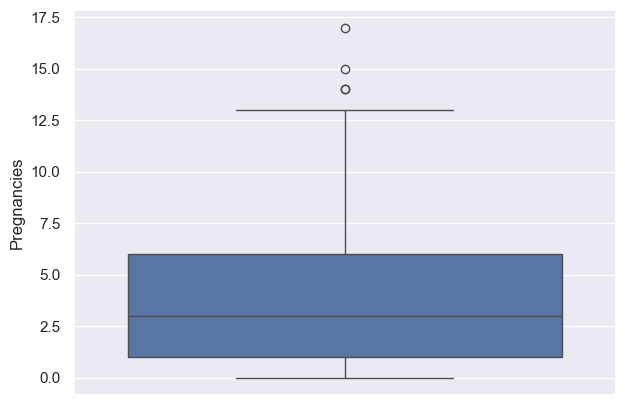

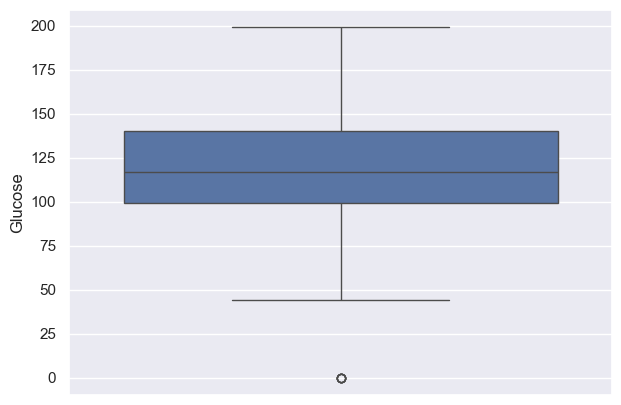

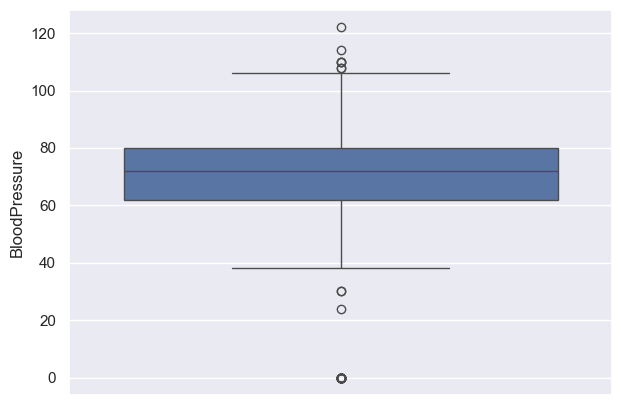

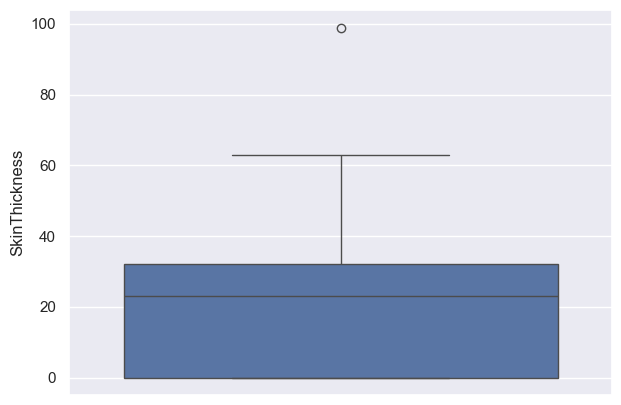

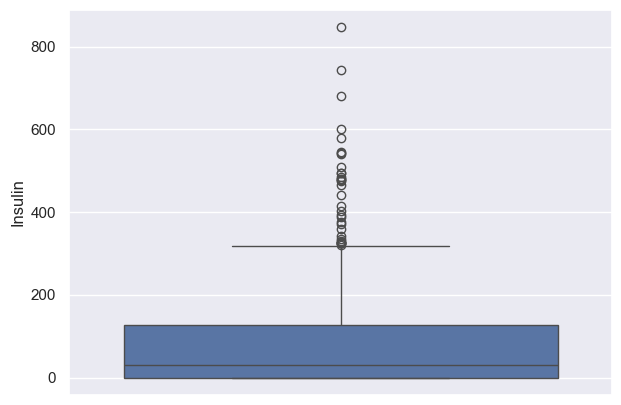

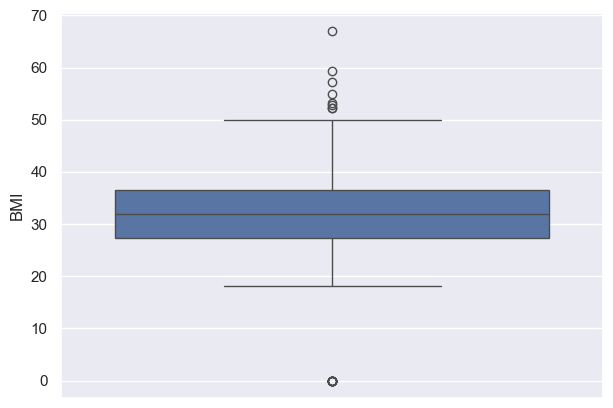

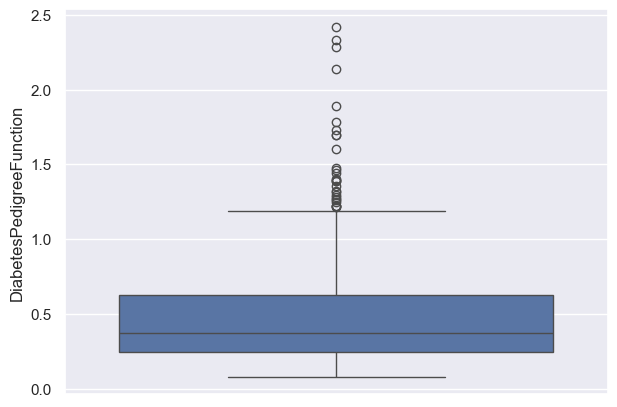

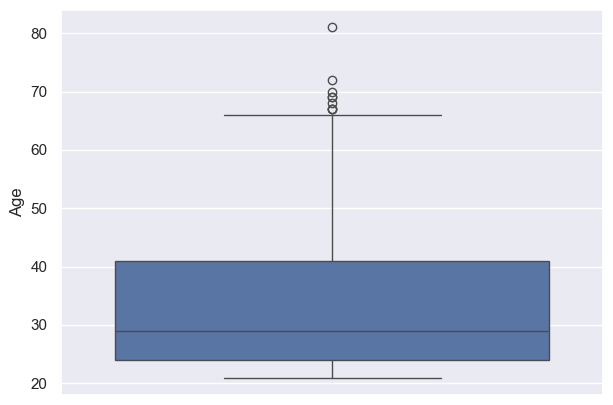

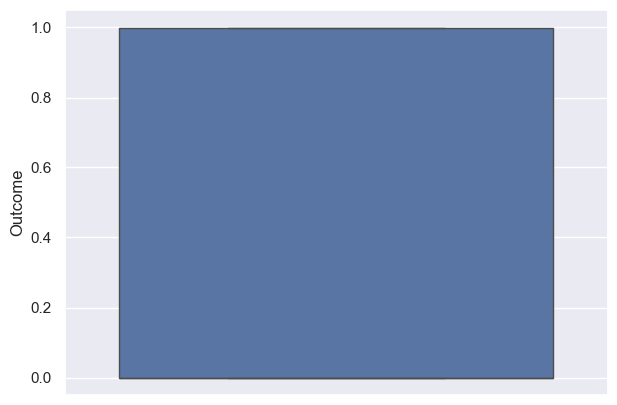

In [39]:
for column in dataset.columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = dataset, y = column)
    plt.show()

Finding outliers by scatter diagram

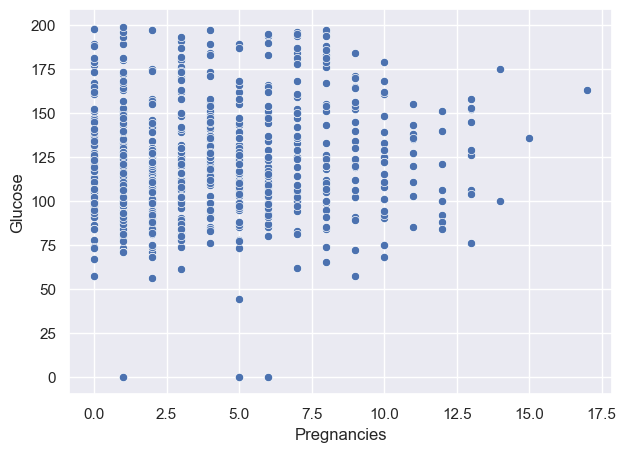

In [40]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = dataset, x = 'Pregnancies', y = 'Glucose')
plt.show()

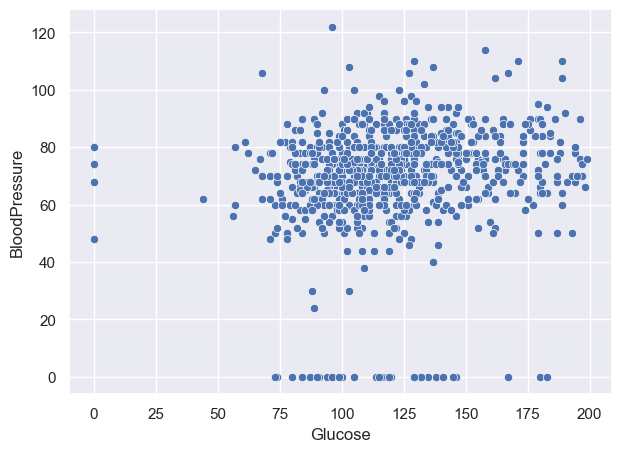

In [41]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = dataset, x = 'Glucose', y = 'BloodPressure')
plt.show()

Finding Outliers by using zscore

In [42]:
zscore = np.abs(stats.zscore(dataset))
print(zscore)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.692891  0.204013   
1       0.844885  1.123396       0.160546       0.530902  0.692891  0.684422   
2       1.233880  1.943724       0.263941       1.288212  0.692891  1.103255   
3       0.844885  0.998208       0.160546       0.154533  0.123302  0.494043   
4       1.141852  0.504055       1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.622642       0.356432       1.722735  0.870031  0.115169   
764     0.547919  0.034598       0.046245       0.405445  0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.735190   
766     0.844885  0.159787       0.470732       1.288212  0.692891  0.240205   
767     0.844885  0.873019       0.046245       0.656358  0.692891  0.202129   

     DiabetesPedigreeFunction       Age

In [43]:
threshold = 3
print(np.where(zscore > threshold))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


Finding outliers using IQR

In [44]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [45]:
print(dataset < (Q1 - 1.5 * IQR) | (dataset > (Q3 + 1.5 * IQR)))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False    False          False          False     True  False   
2          False    False          False           True     True  False   
3          False    False          False          False    False  False   
4           True    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False     True  False   
765        False    False          False          False    False  False   
766        False    False          False           True     True  False   
767        False    False          False          False     True  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                        True  False    False  
1  

In [46]:
dataset_clean = dataset.copy()

Removing outliers using zscore

In [47]:
dataset_clean = dataset_clean[(zscore < threshold).all(axis = 1)]

In [48]:
dataset.shape

(768, 9)

In [49]:
dataset_clean.shape

(688, 9)

Removing outliers using IQR

In [50]:
dataset_iqr_clean = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [51]:
dataset.shape

(768, 9)

In [52]:
dataset_iqr_clean.shape

(639, 9)

In [53]:
dataset_iqr_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [54]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Solving outliers and making data into a normal distribution using log10 transformation (for data that has a positive skewness). 
log10 transformation has to apply to just data that does not have zeros or negative values

In [55]:
dataset[dataset['DiabetesPedigreeFunction'] == 0].shape

(0, 9)

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\4130178618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DiabetesPedigreeFunction'], color = 'green')


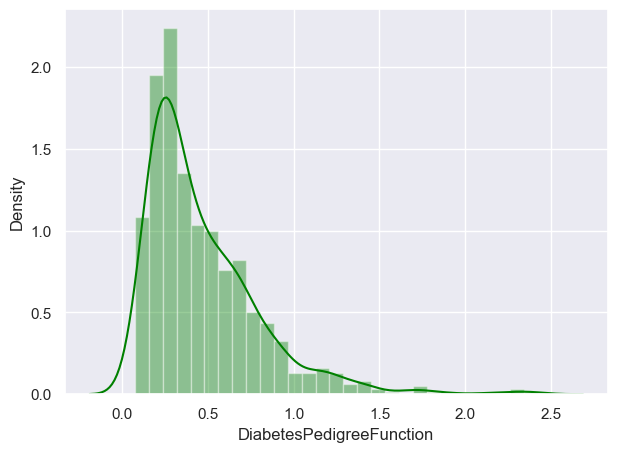

In [56]:
plt.figure(figsize = (7, 5))
sns.distplot(dataset['DiabetesPedigreeFunction'], color = 'green')
plt.show()

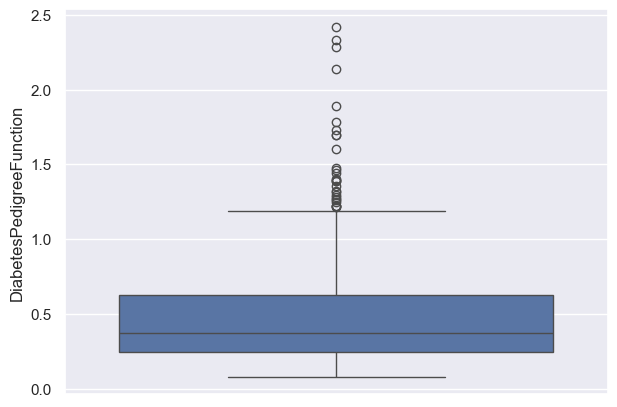

In [57]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset, y = 'DiabetesPedigreeFunction')
plt.show()

In [58]:
dataset['DiabetesPedigreeFunction_log10'] = np.log10(dataset['DiabetesPedigreeFunction'])

In [59]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10
0,6,148,72,35,0,33.6,0.627,50,1,-0.202732
1,1,85,66,29,0,26.6,0.351,31,0,-0.454693
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284
4,0,137,40,35,168,43.1,2.288,33,1,0.359456


C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\3979554190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DiabetesPedigreeFunction_log10'], color = 'green')


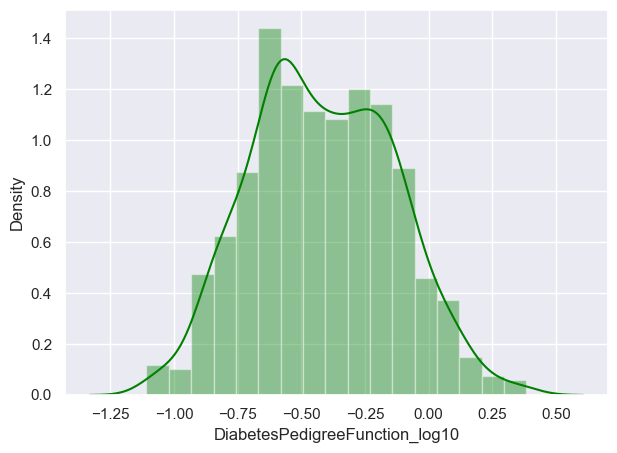

In [60]:
plt.figure(figsize = (7, 5))
sns.distplot(dataset['DiabetesPedigreeFunction_log10'], color = 'green')
plt.show()

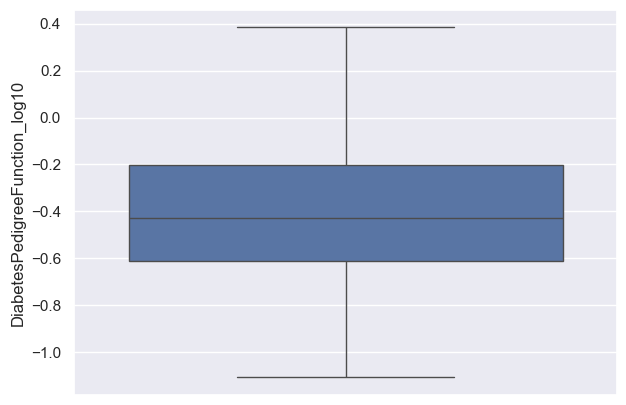

In [61]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset, y = 'DiabetesPedigreeFunction_log10')
plt.show()

Solving outliers and making data into a normal distribution using square root transformation (for data that has a positive skewness). 
square root transformation could apply to data which has zeros and positive values.

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\4089433388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Insulin'], color = 'green')


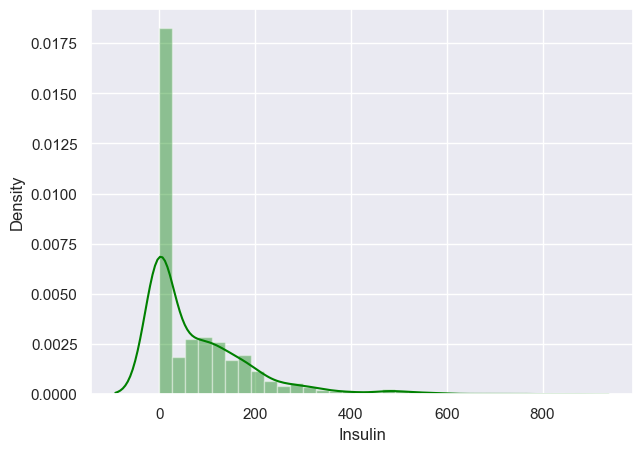

In [62]:
plt.figure(figsize = (7, 5))
sns.distplot(dataset['Insulin'], color = 'green')
plt.show()

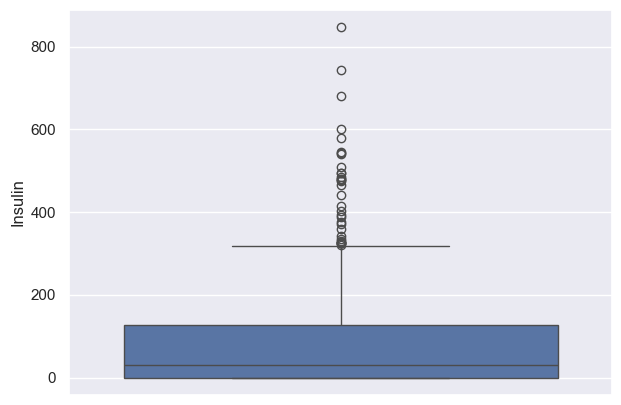

In [63]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset, y = 'Insulin')
plt.show()

In [64]:
dataset[dataset['Insulin'] == 0].shape

(374, 10)

In [65]:
dataset['Insulin_srt'] = np.sqrt(dataset['Insulin'])

In [66]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt
0,6,148,72,35,0,33.6,0.627,50,1,-0.202732,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,-0.454693,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284,9.695360
4,0,137,40,35,168,43.1,2.288,33,1,0.359456,12.961481


C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\2814202376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Insulin_srt'], color = 'green')


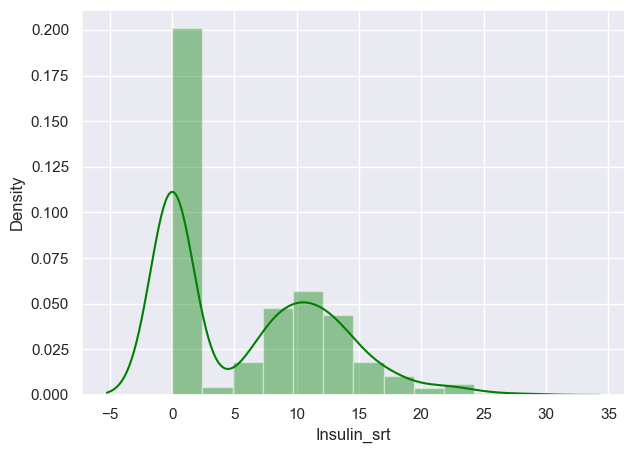

In [67]:
plt.figure(figsize = (7, 5))
sns.distplot(dataset['Insulin_srt'], color = 'green')
plt.show()

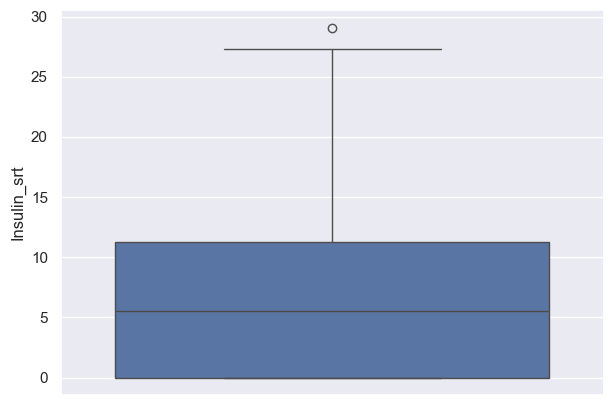

In [68]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = dataset, y = 'Insulin_srt')
plt.show()

Adding columns to the dataset

In [69]:
dataset.shape

(768, 11)

In [70]:
dataset['zeors1'] = np.zeros((dataset.shape[0]))

In [71]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt,zeors1
0,6,148,72,35,0,33.6,0.627,50,1,-0.202732,0.000000,0.0
1,1,85,66,29,0,26.6,0.351,31,0,-0.454693,0.000000,0.0
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631,0.000000,0.0
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284,9.695360,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.359456,12.961481,0.0


In [72]:
dataset = dataset.assign(zeros2 = np.zeros((dataset.shape[0])))

In [73]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt,zeors1,zeros2
0,6,148,72,35,0,33.6,0.627,50,1,-0.202732,0.000000,0.0,0.0
1,1,85,66,29,0,26.6,0.351,31,0,-0.454693,0.000000,0.0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631,0.000000,0.0,0.0
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284,9.695360,0.0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.359456,12.961481,0.0,0.0


Dropping columns

In [74]:
dataset.drop(columns = ['zeors1', 'zeros2'], axis = 1, inplace = True)

In [75]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt
0,6,148,72,35,0,33.6,0.627,50,1,-0.202732,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,-0.454693,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284,9.695360
4,0,137,40,35,168,43.1,2.288,33,1,0.359456,12.961481


Dropping rows

In [76]:
dataset2 = dataset.drop(dataset.index[[0, 1]])

In [77]:
dataset2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt
2,8,183,64,0,0,23.3,0.672,32,1,-0.172631,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,-0.777284,9.695360
4,0,137,40,35,168,43.1,2.288,33,1,0.359456,12.961481
5,5,116,74,0,0,25.6,0.201,30,0,-0.696804,0.000000
6,3,78,50,32,88,31.0,0.248,26,1,-0.605548,9.380832


In [78]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt
763,10,101,76,48,180,32.9,0.171,63,0,-0.767004,13.416408
764,2,122,70,27,0,36.8,0.340,27,0,-0.468521,0.000000
765,5,121,72,23,112,26.2,0.245,30,0,-0.610834,10.583005
766,1,126,60,0,0,30.1,0.349,47,1,-0.457175,0.000000
767,1,93,70,31,0,30.4,0.315,23,0,-0.501689,0.000000


In [79]:
dataset3 = dataset[: -2]

In [80]:
dataset3.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log10,Insulin_srt
761,9,170,74,31,0,44.0,0.403,43,1,-0.394695,0.000000
762,9,89,62,0,0,22.5,0.142,33,0,-0.847712,0.000000
763,10,101,76,48,180,32.9,0.171,63,0,-0.767004,13.416408
764,2,122,70,27,0,36.8,0.340,27,0,-0.468521,0.000000
765,5,121,72,23,112,26.2,0.245,30,0,-0.610834,10.583005


Pivot table

In [81]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [82]:
df2 = df[['marital.status', 'sex', 'capital.gain']]
df2.head()

,marital.status,sex,capital.gain
0,Widowed,Female,0
1,Widowed,Female,0
2,Widowed,Female,0
3,Divorced,Female,0
4,Separated,Female,0


In [83]:
pd.pivot_table(df2, index = ['marital.status', 'sex'], aggfunc = 'sum')

capital.gain
marital.status        sex                 
Divorced              Female       1191724
                      Male         2044623
Married-AF-spouse     Female          2653
                      Male            7298
Married-civ-spouse    Female       2667365
                      Male        23763171
Married-spouse-absent Female         73961
                      Male          199404
Never-married         Female       1564543
                      Male         2458550
Separated             Female        218557
                      Male          330401
Widowed               Female        403547
                      Male          163527

In [84]:
pd.pivot_table(df2, index = ['marital.status', 'sex'], aggfunc = 'mean')

capital.gain
marital.status        sex                 
Divorced              Female    446.004491
                      Male     1154.501976
Married-AF-spouse     Female    189.500000
                      Male      810.888889
Married-civ-spouse    Female   1609.755582
                      Male     1784.155792
Married-spouse-absent Female    360.785366
                      Male      936.169014
Never-married         Female    328.202853
                      Male      415.576403
Separated             Female    346.366086
                      Male      838.581218
Widowed               Female    489.147879
                      Male      973.375000

In [85]:
pd.pivot_table(df2, index = ['marital.status', 'sex'], aggfunc = 'count')

capital.gain
marital.status        sex                 
Divorced              Female          2672
                      Male            1771
Married-AF-spouse     Female            14
                      Male               9
Married-civ-spouse    Female          1657
                      Male           13319
Married-spouse-absent Female           205
                      Male             213
Never-married         Female          4767
                      Male            5916
Separated             Female           631
                      Male             394
Widowed               Female           825
                      Male             168

Extracting data from continoues data by regular expression

In [87]:
rawdata = {'data' : ['2018-01-01 35 20736.87 Paul',
                     '2017-06-15 67 10567.70 Harry', 
                     '2015-07-23 20 3873.90 Noel',
                     '2011-05-12 56 82320.65 John',
                     '2010-03-26 21 28737.01 Sally',
                     '2016-08-19 82 80327.63 Mary',
                     '2018-08-12 90 30467.92 Steve']}

In [88]:
dataf = pd.DataFrame(data = rawdata, columns = ['data'])
dataf

,data
0,2018-01-01 35 20736.87 Paul
1,2017-06-15 67 10567.70 Harry
2,2015-07-23 20 3873.90 Noel
3,2011-05-12 56 82320.65 John
4,2010-03-26 21 28737.01 Sally
5,2016-08-19 82 80327.63 Mary
6,2018-08-12 90 30467.92 Steve


In [90]:
dataf['Emp_Name'] = dataf['data'].str.extract(('([A-Z]\w{0,})'), expand = True)
dataf['Emp_Name']

0     Paul
1    Harry
2     Noel
3     John
4    Sally
5     Mary
6    Steve
Name: Emp_Name, dtype: object

In [99]:
dataf['Salary'] = dataf['data'].str.extract(('(\d\d\d\d\d)'), expand = True)

In [100]:
dataf['Salary']

0    20736
1    10567
2      NaN
3    82320
4    28737
5    80327
6    30467
Name: Salary, dtype: object

In [101]:
dataf['Date'] = dataf['data'].str.extract(('(....-..-..)'), expand = True)

In [102]:
dataf['Date']

0    2018-01-01
1    2017-06-15
2    2015-07-23
3    2011-05-12
4    2010-03-26
5    2016-08-19
6    2018-08-12
Name: Date, dtype: object

In [105]:
dataf['Dep_ID'] = dataf['data'].str.extract(('(\s+\d\d\s+)'), expand = True)

In [106]:
dataf['Dep_ID']

0     35 
1     67 
2     20 
3     56 
4     21 
5     82 
6     90 
Name: Dep_ID, dtype: object

In [107]:
dataf

,data,Emp_Name,Salary,Date,Dep_ID
0,2018-01-01 35 20736.87 Paul,Paul,20736,2018-01-01,35
1,2017-06-15 67 10567.70 Harry,Harry,10567,2017-06-15,67
2,2015-07-23 20 3873.90 Noel,Noel,NaN,2015-07-23,20
3,2011-05-12 56 82320.65 John,John,82320,2011-05-12,56
4,2010-03-26 21 28737.01 Sally,Sally,28737,2010-03-26,21
5,2016-08-19 82 80327.63 Mary,Mary,80327,2016-08-19,82
6,2018-08-12 90 30467.92 Steve,Steve,30467,2018-08-12,90


Lambda, Applymap, Apply, Map functions

In [108]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
capitalize = lambda x: x.upper()

In [110]:
df['species'] = df['species'].apply(capitalize)

In [111]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA


In [112]:
not_cap = lambda x: x.lower()

In [113]:
df['species'] = df['species'].map(not_cap)

In [114]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
df.drop(columns = ['species'], axis = 1, inplace = True)

In [116]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df.applymap(np.sqrt)

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\2067765065.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(np.sqrt)


,sepal_length,sepal_width,petal_length,petal_width
0,2.258318,1.870829,1.183216,0.447214
1,2.213594,1.732051,1.183216,0.447214
2,2.167948,1.788854,1.140175,0.447214
3,2.144761,1.760682,1.224745,0.447214
4,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575
146,2.509980,1.581139,2.236068,1.378405
147,2.549510,1.732051,2.280351,1.414214
148,2.489980,1.843909,2.323790,1.516575


In [118]:
df.applymap(np.square)

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\2297963070.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(np.square)


,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [119]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
def mult50(x):
    if type(x) is str:
        return x
    else:
        return x * 50

In [122]:
df.applymap(mult50)

C:\Users\loptop\AppData\Local\Temp\ipykernel_6040\2466001715.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(mult50)


,sepal_length,sepal_width,petal_length,petal_width,species
0,255.0,175.0,70.0,10.0,setosa
1,245.0,150.0,70.0,10.0,setosa
2,235.0,160.0,65.0,10.0,setosa
3,230.0,155.0,75.0,10.0,setosa
4,250.0,180.0,70.0,10.0,setosa
...,...,...,...,...,...
145,335.0,150.0,260.0,115.0,virginica
146,315.0,125.0,250.0,95.0,virginica
147,325.0,150.0,260.0,100.0,virginica
148,310.0,170.0,270.0,115.0,virginica


Merging dataframes

In [123]:
data1 = pd.DataFrame()
data1['ID'] = [1, 2, 3, 4, 5, 6, 7]
data1['Source'] = ['New york', 'Dallas', 'New jersey', 'San antonio', 'San diego', 'Hartford', 'Jackson']
data1['Destination'] = ['Chicago', 'New england', 'Madison', 'Cincinnati', 'Naperville', 'Los angeles', 'Las vegas']

In [124]:
data1

,ID,Source,Destination
0,1,New york,Chicago
1,2,Dallas,New england
2,3,New jersey,Madison
3,4,San antonio,Cincinnati
4,5,San diego,Naperville
5,6,Hartford,Los angeles
6,7,Jackson,Las vegas


In [126]:
data2 = pd.DataFrame()
data2['ID'] = [5, 6, 7, 8, 9, 10, 11]
data2['Source'] = ['New delhi', 'Jaipur', 'Banglore', 'Kolkata', 'Hyderabad', 'Chandigarh', 'Mysore']
data2['Destination'] = ['Mumbai', 'New delhi', 'Chennai', 'Pune', 'Nagpur', 'Shimla', 'Kanpur']

In [127]:
data2

,ID,Source,Destination
0,5,New delhi,Mumbai
1,6,Jaipur,New delhi
2,7,Banglore,Chennai
3,8,Kolkata,Pune
4,9,Hyderabad,Nagpur
5,10,Chandigarh,Shimla
6,11,Mysore,Kanpur


In [129]:
bus_data = pd.DataFrame()
bus_data['ID'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
bus_data['Bus_Code'] = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
bus_data['Bus_Service'] = ['yello', 'orange', 'black', 'white', 'blue', 'pink', 'green', 'magenta', 'violet', 'peach', 'teal', 'grey', 'gold', 'silver', 'plantinum']

In [130]:
bus_data

,ID,Bus_Code,Bus_Service
0,1,110,yello
1,2,120,orange
2,3,130,black
3,4,140,white
4,5,150,blue
5,6,160,pink
6,7,170,green
7,8,180,magenta
8,9,190,violet
9,10,200,peach


In [131]:
# Full outer join
pd.merge(data1, data2, on = 'ID', how = 'outer')

,ID,Source_x,Destination_x,Source_y,Destination_y
0,1,New york,Chicago,NaN,NaN
1,2,Dallas,New england,NaN,NaN
2,3,New jersey,Madison,NaN,NaN
3,4,San antonio,Cincinnati,NaN,NaN
4,5,San diego,Naperville,New delhi,Mumbai
5,6,Hartford,Los angeles,Jaipur,New delhi
6,7,Jackson,Las vegas,Banglore,Chennai
7,8,NaN,NaN,Kolkata,Pune
8,9,NaN,NaN,Hyderabad,Nagpur
9,10,NaN,NaN,Chandigarh,Shimla


In [134]:
# Right outer join
pd.merge(data1, data2, on = 'ID', how = 'right')

,ID,Source_x,Destination_x,Source_y,Destination_y
0,5,San diego,Naperville,New delhi,Mumbai
1,6,Hartford,Los angeles,Jaipur,New delhi
2,7,Jackson,Las vegas,Banglore,Chennai
3,8,NaN,NaN,Kolkata,Pune
4,9,NaN,NaN,Hyderabad,Nagpur
5,10,NaN,NaN,Chandigarh,Shimla
6,11,NaN,NaN,Mysore,Kanpur


In [135]:
# Left outer join
pd.merge(data1, data2, on = 'ID', how = 'left')

,ID,Source_x,Destination_x,Source_y,Destination_y
0,1,New york,Chicago,NaN,NaN
1,2,Dallas,New england,NaN,NaN
2,3,New jersey,Madison,NaN,NaN
3,4,San antonio,Cincinnati,NaN,NaN
4,5,San diego,Naperville,New delhi,Mumbai
5,6,Hartford,Los angeles,Jaipur,New delhi
6,7,Jackson,Las vegas,Banglore,Chennai


In [136]:
# Inner join
pd.merge(data1, data2, on = 'ID', how = 'inner')

,ID,Source_x,Destination_x,Source_y,Destination_y
0,5,San diego,Naperville,New delhi,Mumbai
1,6,Hartford,Los angeles,Jaipur,New delhi
2,7,Jackson,Las vegas,Banglore,Chennai


In [137]:
# Suffixing column names
pd.merge(data1, data2, on = 'ID', how = 'right', suffixes = ('_leftdf', '_rightdf'))

,ID,Source_leftdf,Destination_leftdf,Source_rightdf,Destination_rightdf
0,5,San diego,Naperville,New delhi,Mumbai
1,6,Hartford,Los angeles,Jaipur,New delhi
2,7,Jackson,Las vegas,Banglore,Chennai
3,8,NaN,NaN,Kolkata,Pune
4,9,NaN,NaN,Hyderabad,Nagpur
5,10,NaN,NaN,Chandigarh,Shimla
6,11,NaN,NaN,Mysore,Kanpur


In [138]:
# Join on the basis of index
pd.merge(data1, data2, right_index = True, left_index = True)

,ID_x,Source_x,Destination_x,ID_y,Source_y,Destination_y
0,1,New york,Chicago,5,New delhi,Mumbai
1,2,Dallas,New england,6,Jaipur,New delhi
2,3,New jersey,Madison,7,Banglore,Chennai
3,4,San antonio,Cincinnati,8,Kolkata,Pune
4,5,San diego,Naperville,9,Hyderabad,Nagpur
5,6,Hartford,Los angeles,10,Chandigarh,Shimla
6,7,Jackson,Las vegas,11,Mysore,Kanpur


In [139]:
# Join along columns
pd.concat([data1, data2], axis = 1)

,ID,Source,Destination,ID,Source,Destination
0,1,New york,Chicago,5,New delhi,Mumbai
1,2,Dallas,New england,6,Jaipur,New delhi
2,3,New jersey,Madison,7,Banglore,Chennai
3,4,San antonio,Cincinnati,8,Kolkata,Pune
4,5,San diego,Naperville,9,Hyderabad,Nagpur
5,6,Hartford,Los angeles,10,Chandigarh,Shimla
6,7,Jackson,Las vegas,11,Mysore,Kanpur


In [140]:
# Join along rows
pd.concat([data1, data2])

,ID,Source,Destination
0,1,New york,Chicago
1,2,Dallas,New england
2,3,New jersey,Madison
3,4,San antonio,Cincinnati
4,5,San diego,Naperville
5,6,Hartford,Los angeles
6,7,Jackson,Las vegas
0,5,New delhi,Mumbai
1,6,Jaipur,New delhi
2,7,Banglore,Chennai


In [141]:
df = pd.concat([data1, data2])
df

,ID,Source,Destination
0,1,New york,Chicago
1,2,Dallas,New england
2,3,New jersey,Madison
3,4,San antonio,Cincinnati
4,5,San diego,Naperville
5,6,Hartford,Los angeles
6,7,Jackson,Las vegas
0,5,New delhi,Mumbai
1,6,Jaipur,New delhi
2,7,Banglore,Chennai


In [143]:
pd.merge(df, bus_data, on = 'ID')

,ID,Source,Destination,Bus_Code,Bus_Service
0,1,New york,Chicago,110,yello
1,2,Dallas,New england,120,orange
2,3,New jersey,Madison,130,black
3,4,San antonio,Cincinnati,140,white
4,5,San diego,Naperville,150,blue
5,6,Hartford,Los angeles,160,pink
6,7,Jackson,Las vegas,170,green
7,5,New delhi,Mumbai,150,blue
8,6,Jaipur,New delhi,160,pink
9,7,Banglore,Chennai,170,green
